In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter


# EDA
1. Разведочный анализ данных (EDA).
Нужно загрузить данные в pandas.DataFrame и провести их анализ и подготовку. Здесь вы вольны делать все то, что посчитаете нужным для понимания ваших данных и подготовки их для вашей модели. Примерный план следующий: вывести первые строки датасета, типы признаков, построить матрицу корреляции признаков, гистограммы распределения значений, статистические характеристики признаков, очистить выбросы, удалить лишние строки и столбцы, посмотреть, есть ли пропуски и как-то обработать их.

## Read data

In [107]:
data = pd.read_csv('data.csv')

In [108]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [110]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [111]:
features_list = data.columns.tolist()
features_list

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [112]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

## Feature engineering

In [113]:
data = data.drop("Id", axis=1)

In [114]:
numerical_columns = data.select_dtypes(include=["int64", "float64"])

In [115]:
def IQR_method(df, n, features):

    outlier_list = []

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_list.extend(outlier_list_column)

    outlier_list = Counter(outlier_list)
    multiple_outliers = list(k for k, v in outlier_list.items() if v > n)
    print(multiple_outliers)
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    print(len(out1))
    print(len(out2))
    print('Total number of deleted outliers is:', out1.shape[0] + out2.shape[0])
    return multiple_outliers

In [116]:
Outliers_IQR = IQR_method(data, 3, numerical_columns)

[93, 246, 335, 520, 635, 703, 705, 1030, 1190, 1416, 53, 113, 185, 197, 304, 313, 523, 529, 661, 664, 691, 769, 828, 848, 854, 1173, 1184, 1230, 1298, 1346, 1423, 745, 1031, 1076, 1268, 178, 898, 1182, 7, 166, 330, 440, 499, 888, 953, 1024, 1386, 224, 278, 496, 798, 803, 1046, 897, 198, 961, 1142, 1328, 1350]
0
61
Total number of deleted outliers is: 61


In [117]:
data = data.drop(Outliers_IQR, axis=0).reset_index(drop=True)

In [118]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      241
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

drop columns where count of nan is ~ half of the dataset length

In [119]:
length = len(data)
(length / 2)

700.5

In [120]:
columns_to_drop = ['Alley', 'Fence', 'MasVnrType', 'MiscFeature', 'PoolQC', 'FireplaceQu']
data = data.drop(columns=columns_to_drop)

In [121]:
categorial_columns = data.select_dtypes(include=["object"])

for col in categorial_columns:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)
    print(f"Filled {col} with: {mode_value}")

Filled MSZoning with: RL
Filled Street with: Pave
Filled LotShape with: Reg
Filled LandContour with: Lvl
Filled Utilities with: AllPub
Filled LotConfig with: Inside
Filled LandSlope with: Gtl
Filled Neighborhood with: NAmes
Filled Condition1 with: Norm
Filled Condition2 with: Norm
Filled BldgType with: 1Fam
Filled HouseStyle with: 1Story
Filled RoofStyle with: Gable
Filled RoofMatl with: CompShg
Filled Exterior1st with: VinylSd
Filled Exterior2nd with: VinylSd
Filled ExterQual with: TA
Filled ExterCond with: TA
Filled Foundation with: PConc
Filled BsmtQual with: TA
Filled BsmtCond with: TA
Filled BsmtExposure with: No
Filled BsmtFinType1 with: Unf
Filled BsmtFinType2 with: Unf
Filled Heating with: GasA
Filled HeatingQC with: Ex
Filled CentralAir with: Y
Filled Electrical with: SBrkr
Filled KitchenQual with: TA
Filled Functional with: Typ
Filled GarageType with: Attchd
Filled GarageFinish with: Unf
Filled GarageQual with: TA
Filled GarageCond with: TA
Filled PavedDrive with: Y
Filled Sa

In [122]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

In [123]:
data.isnull().sum()


MSSubClass         0
MSZoning           0
LotFrontage      241
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

In [124]:
columns_to_set_mean = ['LotFrontage', 'MasVnrArea']
for col in columns_to_set_mean:
    mean_value = data[col].mean()
    data[col] = data[col].fillna(mean_value)
    print(f"Filled {col} with: {mean_value}")

Filled LotFrontage with: 69.24224137931034
Filled MasVnrArea with: 99.64275466284074


now we see that all columns contain 1401 non-null values

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1401 non-null   int64  
 1   MSZoning       1401 non-null   object 
 2   LotFrontage    1401 non-null   float64
 3   LotArea        1401 non-null   int64  
 4   Street         1401 non-null   object 
 5   LotShape       1401 non-null   object 
 6   LandContour    1401 non-null   object 
 7   Utilities      1401 non-null   object 
 8   LotConfig      1401 non-null   object 
 9   LandSlope      1401 non-null   object 
 10  Neighborhood   1401 non-null   object 
 11  Condition1     1401 non-null   object 
 12  Condition2     1401 non-null   object 
 13  BldgType       1401 non-null   object 
 14  HouseStyle     1401 non-null   object 
 15  OverallQual    1401 non-null   int64  
 16  OverallCond    1401 non-null   int64  
 17  YearBuilt      1401 non-null   int64  
 18  YearRemo

## Visualisation

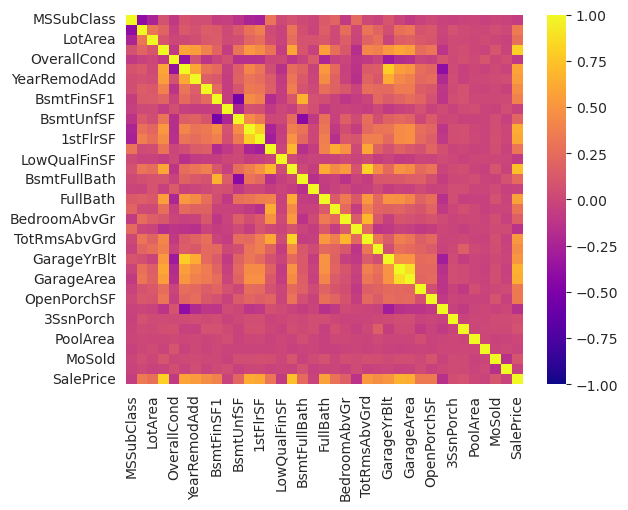

In [126]:
correlation_matrix = round(data.corr(numeric_only=True), 2)

axis_corr = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1, center=0,
    cmap='plasma',
)

plt.show()


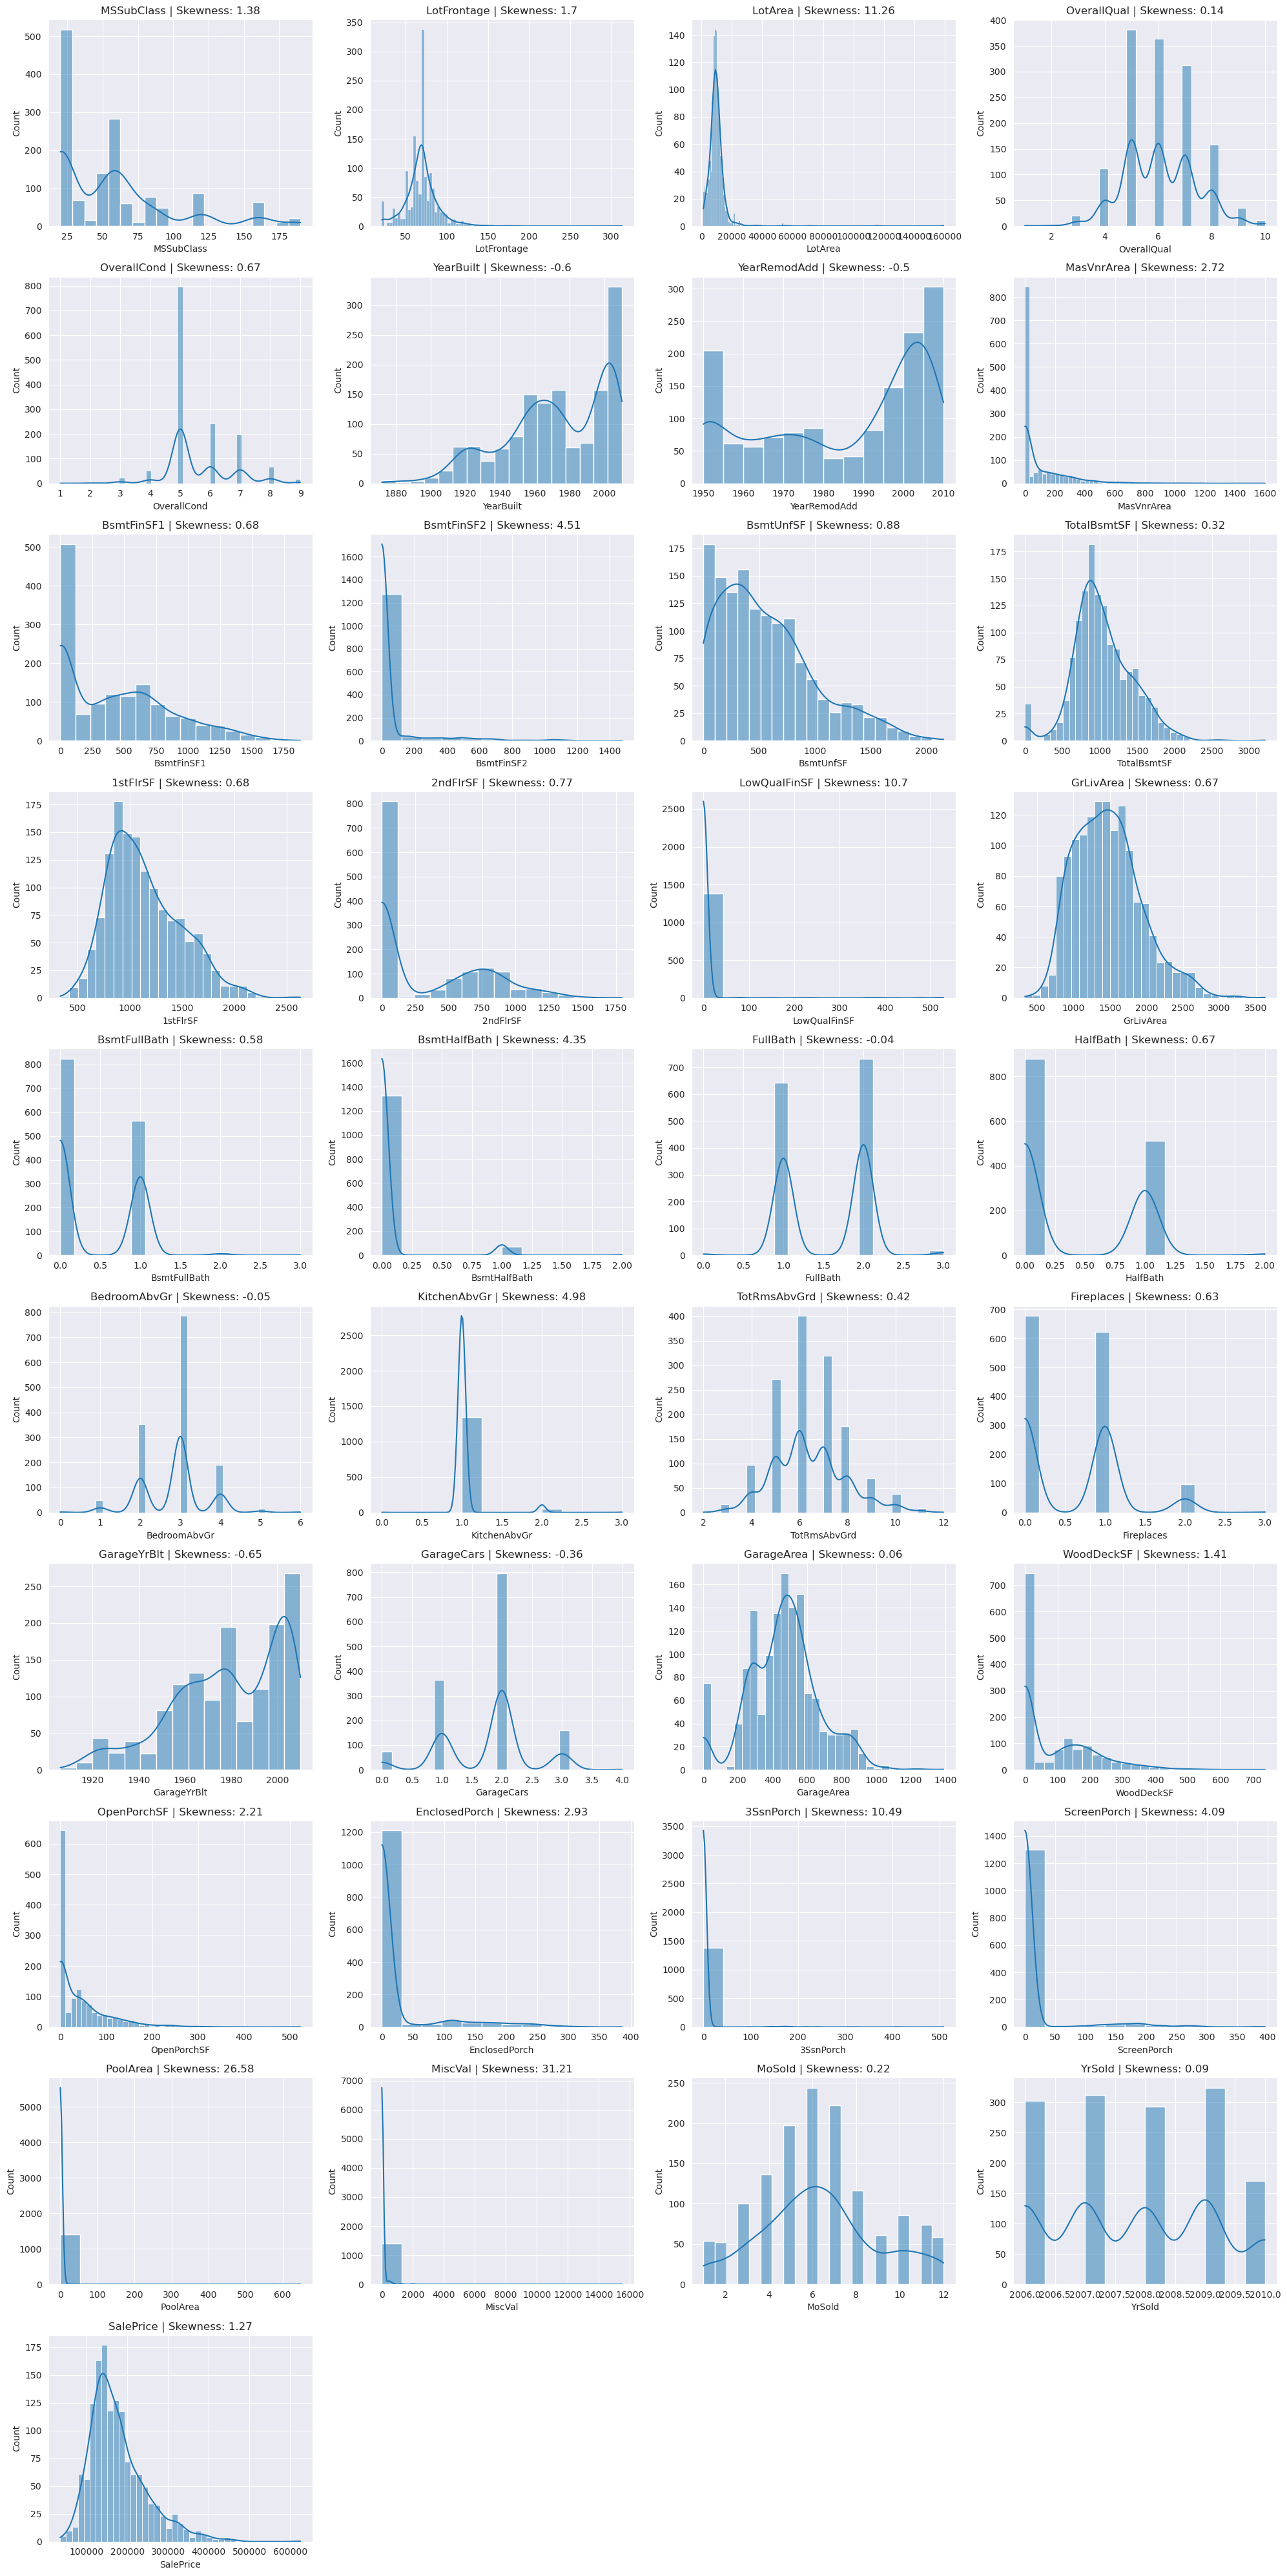

In [127]:
import math

sns.set_style("darkgrid")

numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
n = len(numerical_columns)
cols = 4
rows = math.ceil(n / cols)

plt.figure(figsize=(20, rows * 4))

for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

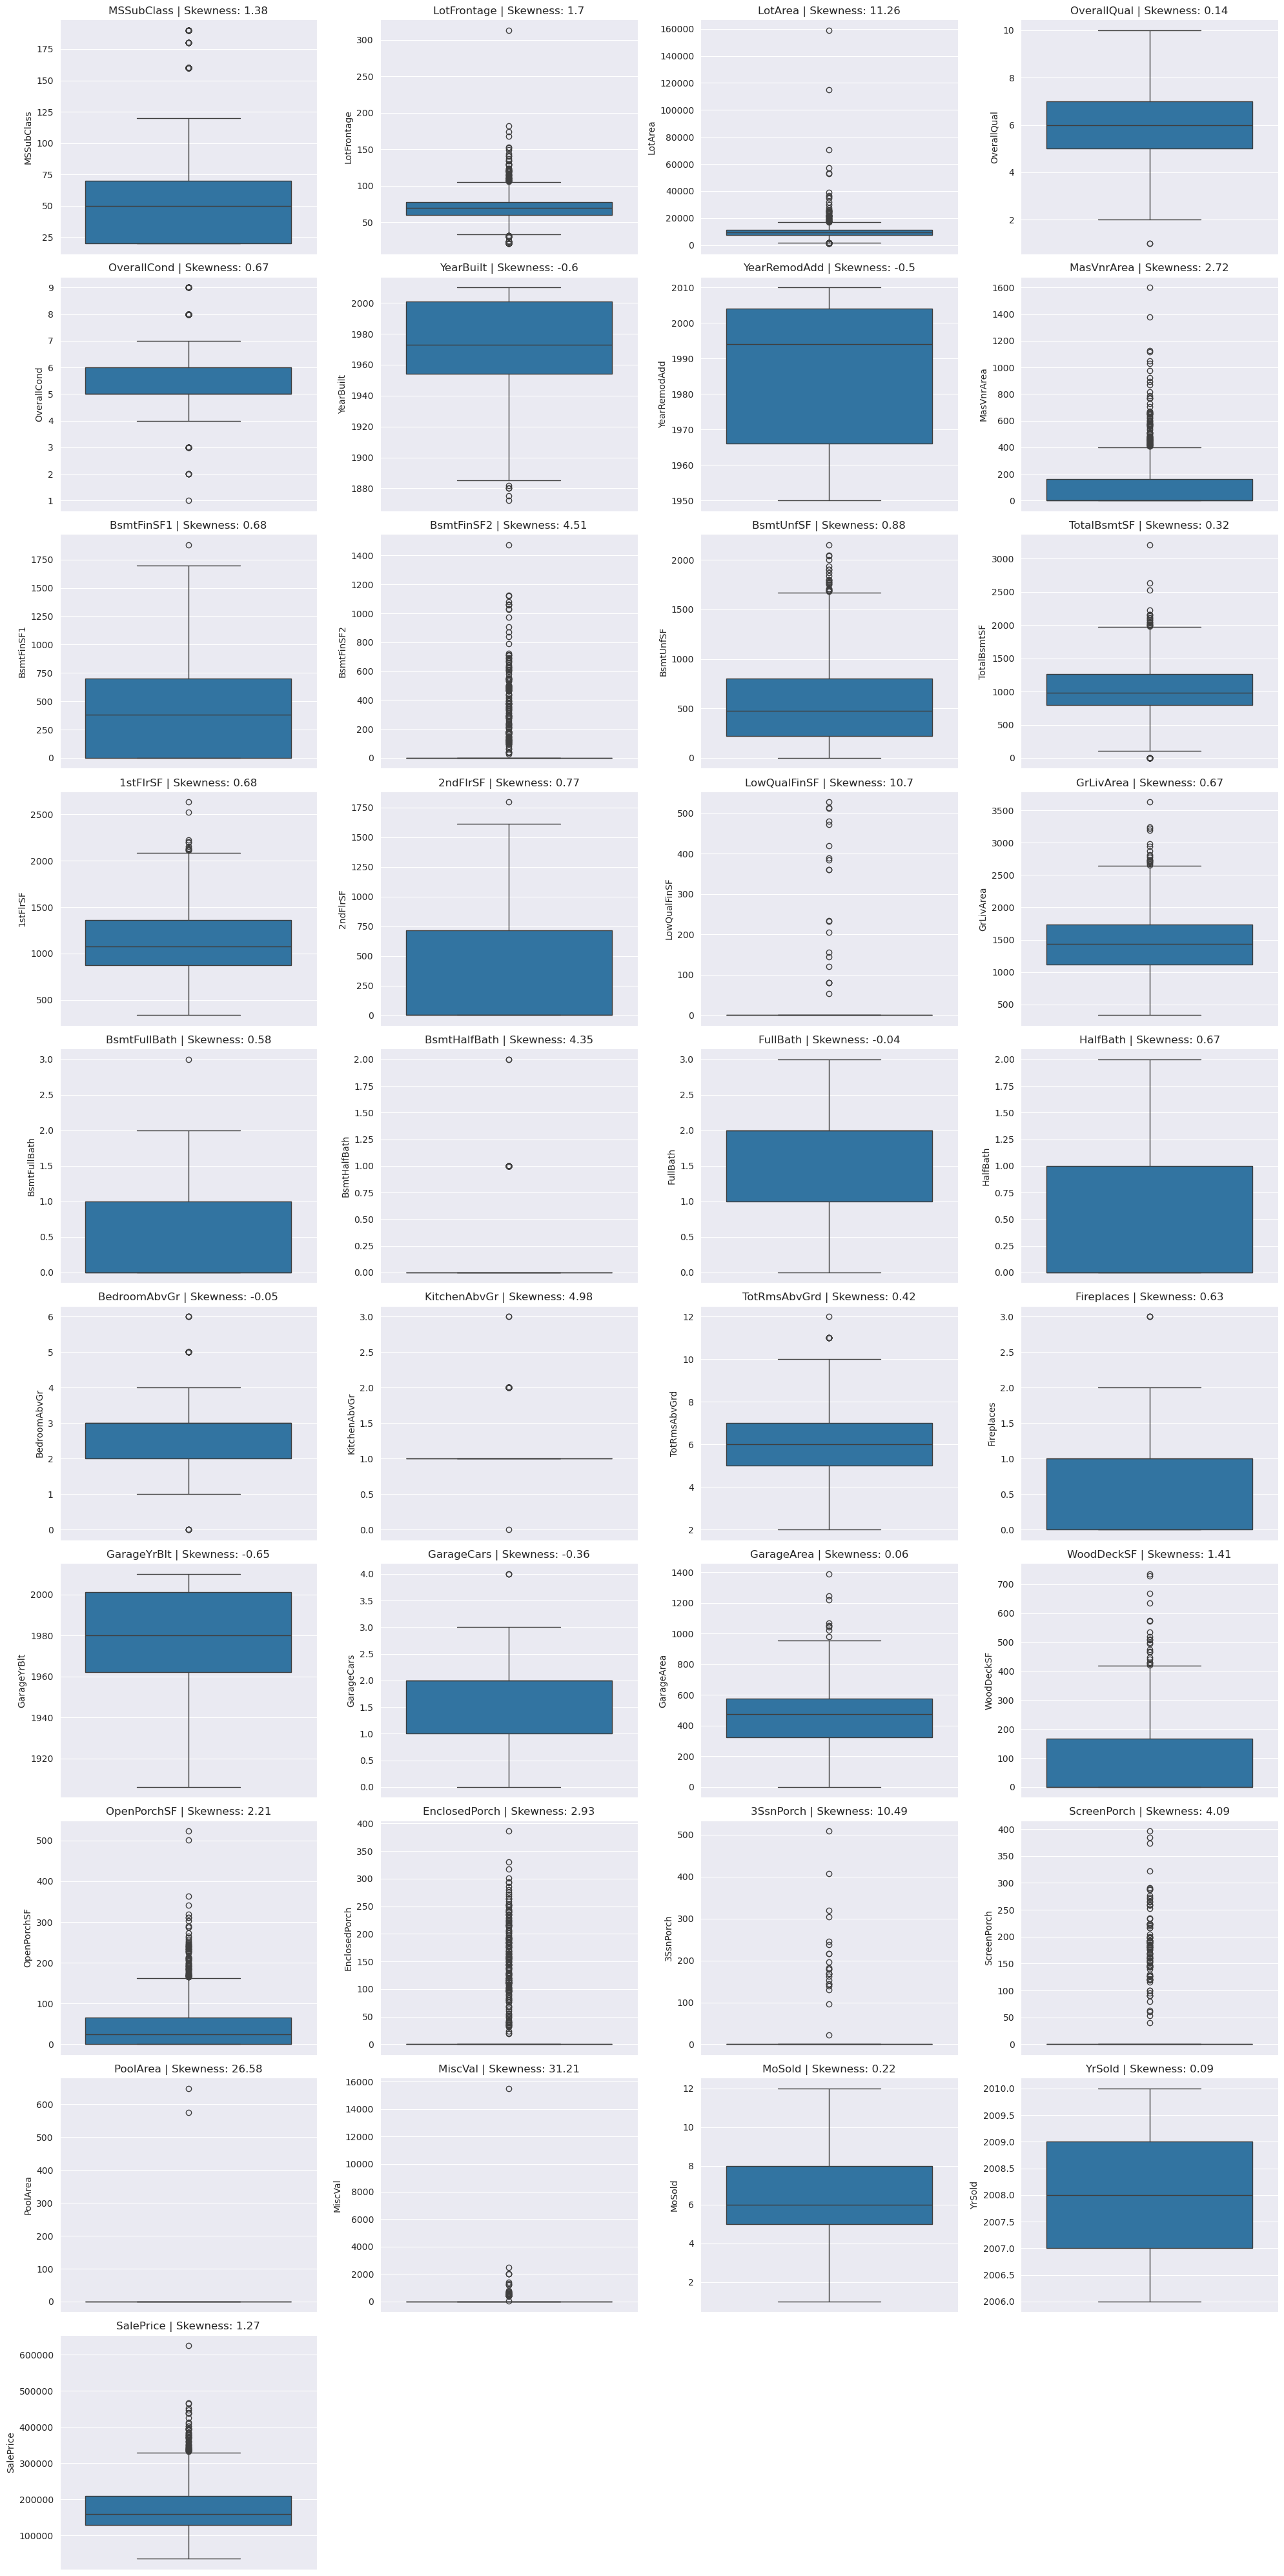

In [128]:
plt.figure(figsize=(20, rows * 4))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(data=data[feature])
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")
plt.tight_layout()
plt.show()

## features scalling

In [129]:
y = data['SalePrice']
X = data.drop('SalePrice', axis=1)

In [130]:
numerical_X_columns = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_X_columns = X.select_dtypes(include=["object"]).columns.tolist()

In [131]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_X_columns:
    X[col] = le.fit_transform(X[col])
X.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4
5,50,3,85.0,14115,1,0,3,0,4,0,...,30,0,320,0,0,700,10,2009,8,4
6,20,3,75.0,10084,1,3,3,0,4,0,...,57,0,0,0,0,0,8,2007,8,4
7,50,4,51.0,6120,1,3,3,0,4,0,...,0,205,0,0,0,0,4,2008,8,0
8,190,3,50.0,7420,1,3,3,0,0,0,...,4,0,0,0,0,0,1,2008,8,4
9,20,3,70.0,11200,1,3,3,0,4,0,...,0,0,0,0,0,0,2,2008,8,4


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [135]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.629546,1.545342,-0.928247,-0.572417,0.042295,0.752184,0.323808,-0.029894,0.590345,-0.226042,...,-0.384222,0.961517,-0.122754,-0.248410,-0.029894,-0.077891,2.122959,0.868378,0.297424,0.198800
1,-0.869373,-0.070702,-0.162815,-0.310351,0.042295,0.752184,0.323808,-0.029894,0.590345,-0.226042,...,-0.708143,-0.366083,-0.122754,-0.248410,-0.029894,-0.077891,-1.940878,-0.633681,0.297424,0.198800
2,0.089935,-0.070702,3.090272,1.247058,0.042295,-1.369847,-2.465924,-0.029894,-1.918900,-0.226042,...,1.429735,-0.366083,6.126541,-0.248410,-0.029894,-0.077891,-1.201999,-1.384711,-1.065010,1.142256
3,-0.149892,-0.070702,0.028543,0.228372,0.042295,0.752184,0.323808,-0.029894,0.590345,-0.226042,...,-0.708143,-0.366083,-0.122754,-0.248410,-0.029894,-0.077891,-0.463119,0.117348,0.297424,0.198800
4,-0.869373,-0.070702,0.315580,-0.125914,0.042295,0.752184,0.323808,-0.029894,0.590345,-0.226042,...,-0.708143,-0.366083,-0.122754,5.794359,-0.029894,2.769700,1.753519,0.117348,0.297424,0.198800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,-0.869373,-0.070702,-0.449852,-0.362817,0.042295,0.752184,0.323808,-0.029894,-1.918900,-0.226042,...,-0.708143,-0.366083,-0.122754,-0.248410,-0.029894,-0.077891,-0.093679,0.117348,-5.152311,-3.575026
1116,-0.149892,1.545342,-0.007707,-0.817887,0.042295,0.752184,-3.860789,-0.029894,0.590345,-0.226042,...,-0.708143,1.558937,-0.122754,-0.248410,-0.029894,-0.077891,2.122959,0.868378,0.297424,0.198800
1117,0.329762,1.545342,-0.928247,-0.643890,0.042295,0.752184,0.323808,-0.029894,0.590345,-0.226042,...,0.166443,-0.034183,-0.122754,-0.248410,-0.029894,-0.077891,2.122959,0.117348,0.297424,0.198800
1118,-0.629546,1.545342,-0.928247,-0.173428,0.042295,0.752184,0.323808,-0.029894,0.590345,-0.226042,...,-0.254654,-0.366083,-0.122754,-0.248410,-0.029894,-0.077891,-0.832559,-1.384711,0.297424,-3.575026


# SVR model

In [136]:
from sklearn.svm import SVR

svr_model = SVR()

svr_model.fit(X_train, y_train)

predictions = svr_model.predict(X_test)

mae = np.mean(abs(predictions - y_test))

print('MAE = %0.4f' % mae)

MAE = 48269.6485


## gread search + K-fold
hyperparameters:

- gamma
- kernel
- C
- epsilon

In [137]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['linear', 'rbf']

C = [0.005, 0.01, 0.05, 0.1 ]

gamma = ['scale', 'auto', 0.1, 0.01, 0.001]

epsilon = [0.01, 0.1, 0.2, 0.5]

hyperparameters_grid = {
    'kernel': kernel,
    'C': C,
    'gamma': gamma,
    'epsilon': epsilon
}

random_cv = RandomizedSearchCV(
    estimator=svr_model,
    param_distributions=hyperparameters_grid,
    cv=5,n_iter = 15,  scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    return_train_score=True,
    random_state=42
)

random_cv.fit(X_train, y_train)





Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.005, 0.01, 0.05, 0.1],
                                        'epsilon': [0.01, 0.1, 0.2, 0.5],
                                        'gamma': ['scale', 'auto', 0.1, 0.01,
                                                  0.001],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=1)

In [138]:
final_model = random_cv.best_estimator_
final_predictions = final_model.predict(X_test)

mae = np.mean(abs(final_predictions - y_test))

print('MAE = %0.4f' % mae)

MAE = 47636.7382
